In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset

In [100]:
test_df = pd.read_csv('./test.csv')
train_df = pd.read_csv('./train.csv')

In [101]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [102]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [103]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [104]:
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S


In [105]:
train_index = train_df.index
test_index = test_df.index

In [106]:
train_index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [107]:
test_index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [108]:
y_train_df = train_df.pop("Survived")


In [109]:
y_train_df

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# 2. Data preprocessing

In [110]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [111]:
test_df.isnull().sum() / len(test_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [112]:
train_df["Cabin"]

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

### 2.1 Decision 1 - Drop cabin

In [113]:
del test_df["Cabin"]
del train_df["Cabin"]

In [114]:
all_df = train_df.append(test_df)
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.05,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,S


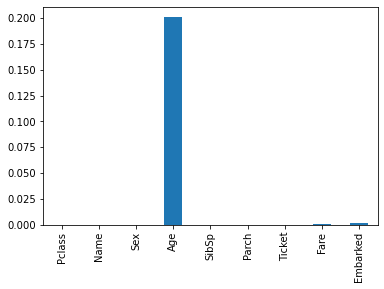

In [115]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

In [116]:
del all_df["Name"]
del all_df["Ticket"]

In [117]:
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...
1305,3,male,nan,0,0,8.05,S
1306,1,female,39.00,0,0,108.90,C
1307,3,male,38.50,0,0,7.25,S


In [118]:
all_df["Sex"] = all_df["Sex"].replace({"male":0, "female":1})
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...
1305,3,0,nan,0,0,8.05,S
1306,1,1,39.00,0,0,108.90,C
1307,3,0,38.50,0,0,7.25,S


In [119]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [120]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0, "C":1, "Q":2, np.nan:99})
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0
...,...,...,...,...,...,...,...
1305,3,0,nan,0,0,8.05,0
1306,1,1,39.00,0,0,108.90,1
1307,3,0,38.50,0,0,7.25,0


In [121]:
all_df["Embarked"].unique()

array([ 0,  1,  2, 99])

In [122]:
pd.get_dummies(all_df["Embarked"], prefix="embarked")

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
...,...,...,...,...
1305,1,0,0,0
1306,0,1,0,0
1307,1,0,0,0


In [123]:
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0
...,...,...,...,...,...,...,...
1305,3,0,nan,0,0,8.05,0
1306,1,1,39.00,0,0,108.90,1
1307,3,0,38.50,0,0,7.25,0


In [124]:
matrix_df = pd.merge(
    all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked"),
    left_index=True, right_index=True
)
matrix_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0
2,1,1,38.00,1,0,71.28,1,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0
4,1,1,35.00,1,0,53.10,0,1,0,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,nan,0,0,8.05,0,1,0,0,0
1306,1,1,39.00,0,0,108.90,1,0,1,0,0
1307,3,0,38.50,0,0,7.25,0,1,0,0,0


In [125]:
matrix_df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02
Fare,-0.56,0.19,0.18,0.16,0.22,1.00,0.05,-0.17,0.29,-0.13,0.04
Embarked,-0.05,0.07,0.07,-0.03,-0.03,0.05,1.00,-0.21,0.06,0.12,0.99
embarked_0,0.10,-0.12,-0.08,0.08,0.07,-0.17,-0.21,1.00,-0.78,-0.49,-0.06
embarked_1,-0.27,0.07,0.09,-0.05,-0.01,0.29,0.06,-0.78,1.00,-0.16,-0.02
embarked_2,0.23,0.09,-0.02,-0.05,-0.10,-0.13,0.12,-0.49,-0.16,1.00,-0.01


In [126]:
all_df.groupby("Pclass")["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [127]:
all_df.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      0
dtype: int64

In [128]:
all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True
)
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0
...,...,...,...,...,...,...,...
1305,3,0,24.82,0,0,8.05,0
1306,1,1,39.00,0,0,108.90,1
1307,3,0,38.50,0,0,7.25,0


In [129]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [139]:
all_df.groupby("Pclass")["Fare"].mean()

Pclass
1   87.51
2   21.18
3   13.30
Name: Fare, dtype: float64

In [141]:
all_df.loc[all_df['Fare'].isnull(),"Fare"] = 13.3

In [142]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64